In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error
warnings.filterwarnings("ignore")

In [2]:
#import the dataset
azure_df = pd.read_csv('AzureUsageData.csv')

#top 5 rows
azure_df.head()

,SubscriptionName,SubscriptionGuid,Date,ResourceGuid,ServiceName,ServiceType,ServiceRegion,ServiceResource,Quantity,Cost
0,Microsoft Workxflow Azure Sponsorship 1,ce833ac4-dac3-4815-99ef-35765a56dcc3,1/13/2024,c0f5cb45-6fb1-41c9-8545-72ad400d9da4,Azure App Service,Free Plan,All,F1 App,0.001344,0.0
1,Microsoft Workxflow Azure Sponsorship 1,ce833ac4-dac3-4815-99ef-35765a56dcc3,2/5/2024,c0f5cb45-6fb1-41c9-8545-72ad400d9da4,Azure App Service,Free Plan,All,F1 App,0.001344,0.0
2,Microsoft Workxflow Azure Sponsorship 1,ce833ac4-dac3-4815-99ef-35765a56dcc3,1/10/2024,a90aec9f-eecb-42c7-8421-9b96716996dc,Azure App Service,Free Plan - Linux,All,F1 App,0.013440,0.0
3,Microsoft Workxflow Azure Sponsorship 1,ce833ac4-dac3-4815-99ef-35765a56dcc3,1/11/2024,a90aec9f-eecb-42c7-8421-9b96716996dc,Azure App Service,Free Plan - Linux,All,F1 App,0.032256,0.0
4,Microsoft Workxflow Azure Sponsorship 1,ce833ac4-dac3-4815-99ef-35765a56dcc3,1/12/2024,a90aec9f-eecb-42c7-8421-9b96716996dc,Azure App Service,Free Plan - Linux,All,F1 App,0.032256,0.0


In [3]:
#remove the unnecessary columns

remove_col = ['SubscriptionName','SubscriptionGuid','ResourceGuid']
azure_df = azure_df.drop(remove_col,axis=1)
azure_df.head()

,Date,ServiceName,ServiceType,ServiceRegion,ServiceResource,Quantity,Cost
0,1/13/2024,Azure App Service,Free Plan,All,F1 App,0.001344,0.0
1,2/5/2024,Azure App Service,Free Plan,All,F1 App,0.001344,0.0
2,1/10/2024,Azure App Service,Free Plan - Linux,All,F1 App,0.013440,0.0
3,1/11/2024,Azure App Service,Free Plan - Linux,All,F1 App,0.032256,0.0
4,1/12/2024,Azure App Service,Free Plan - Linux,All,F1 App,0.032256,0.0


In [4]:
#convert date column to datetype and extract year and month then
azure_df['Date'] = pd.to_datetime(azure_df['Date'])

azure_df['month'] = pd.to_datetime(azure_df['Date']).dt.month
azure_df['year'] = pd.to_datetime(azure_df['Date']).dt.year

In [5]:
#checking null values
azure_df.isnull().sum()

Date               0
ServiceName        0
ServiceType        0
ServiceRegion      0
ServiceResource    0
Quantity           0
Cost               0
month              0
year               0
dtype: int64

In [6]:
#get cost only above 1
azure_df = azure_df[azure_df['Cost']> 1]

## Data Analysis

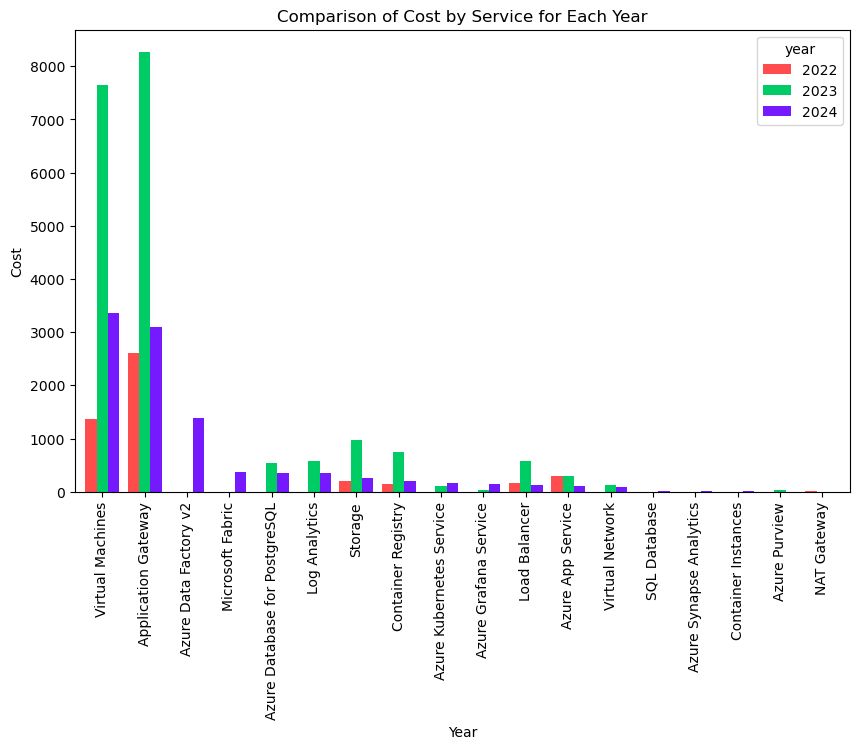

In [7]:
#Comparison of Cost by ServiceName for Each Year (2022-2024)


ServiceName_grpby_year = azure_df.groupby(['year','ServiceName'])['Cost'].sum().reset_index()

pivot_df = ServiceName_grpby_year.pivot(index='ServiceName', columns='year', values='Cost')
sorted_pivot_df = pivot_df.sort_values(by=pivot_df.columns[-1], ascending=False)
sorted_pivot_df = sorted_pivot_df.reset_index()
ax = sorted_pivot_df.plot(x ='ServiceName', kind='bar', figsize=(10, 6),color=['#ff4d4d','#00cc66','#751aff'],width=0.8)
plt.xlabel('Year')
plt.ylabel('Cost')
plt.title('Comparison of Cost by Service for Each Year')
plt.show()


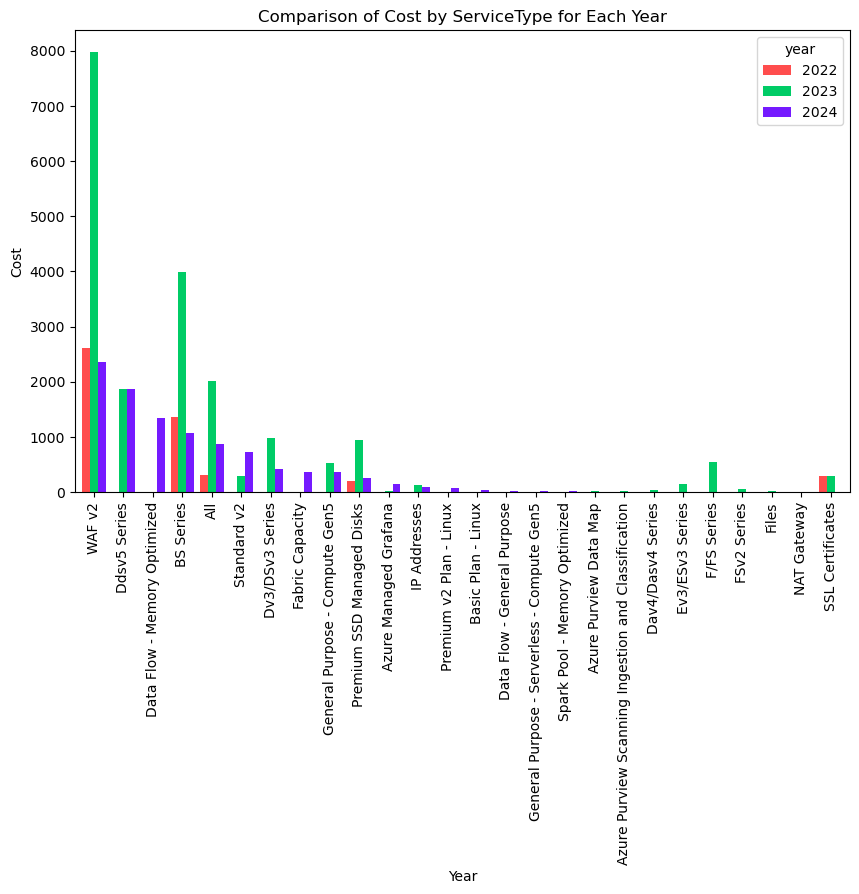

In [8]:
#Comparison of Cost by ServiceType for Each Year (2022-2024)


ServiceType_grpby_year = azure_df.groupby(['year','ServiceType'])['Cost'].sum().reset_index()

pivot_df = ServiceType_grpby_year.pivot(index='ServiceType', columns='year', values='Cost')
sorted_pivot_df = pivot_df.sort_values(by=pivot_df.columns[-1], ascending=False)
sorted_pivot_df = sorted_pivot_df.reset_index()
ax = sorted_pivot_df.plot(x ='ServiceType', kind='bar', figsize=(10, 6),color=['#ff4d4d','#00cc66','#751aff'],width=0.8)
plt.xlabel('Year')
plt.ylabel('Cost')
plt.title('Comparison of Cost by ServiceType for Each Year')
plt.show()


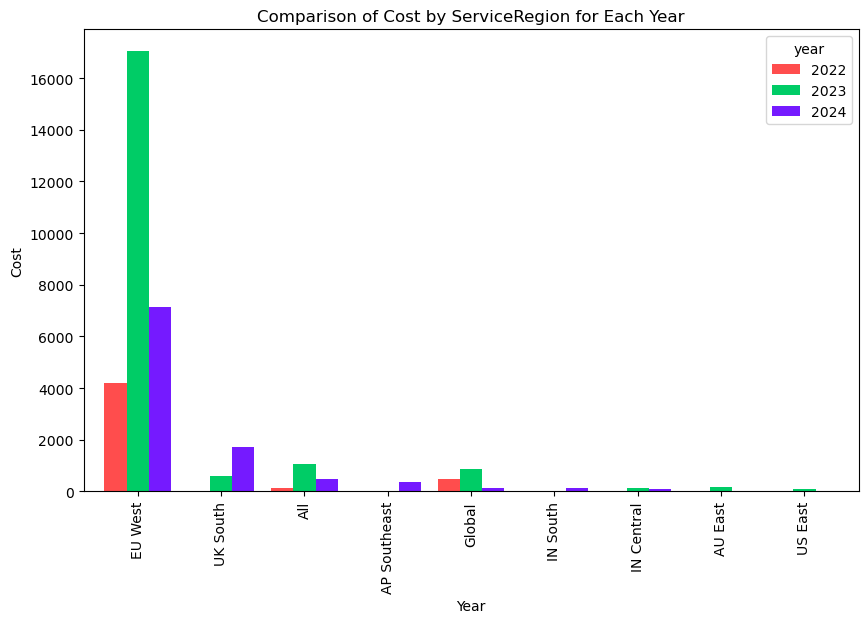

In [9]:
#Comparison of Cost by ServiceRegion for Each Year (2022-2024)


ServiceRegion_grpby_year = azure_df.groupby(['year','ServiceRegion'])['Cost'].sum().reset_index()

pivot_df = ServiceRegion_grpby_year.pivot(index='ServiceRegion', columns='year', values='Cost')
sorted_pivot_df = pivot_df.sort_values(by=pivot_df.columns[-1], ascending=False)
sorted_pivot_df = sorted_pivot_df.reset_index()
ax = sorted_pivot_df.plot(x ='ServiceRegion', kind='bar', figsize=(10, 6),color=['#ff4d4d','#00cc66','#751aff'],width=0.8)
plt.xlabel('Year')
plt.ylabel('Cost')
plt.title('Comparison of Cost by ServiceRegion for Each Year')
plt.show()


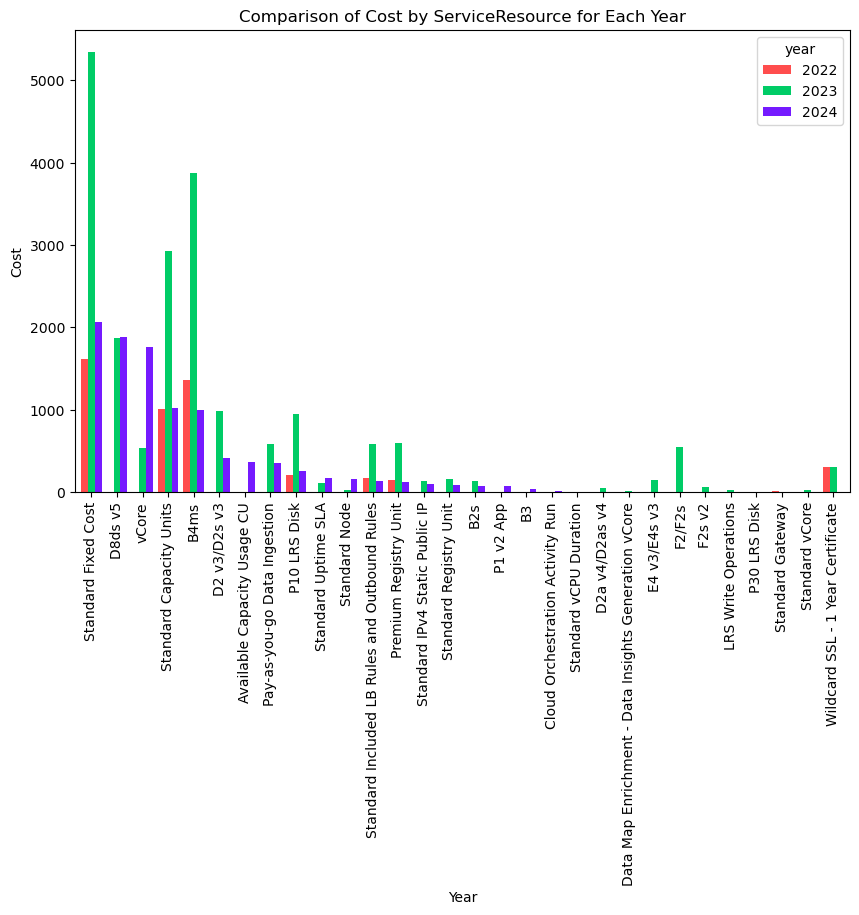

In [10]:
#Comparison of Cost by ServiceResource for Each Year (2022-2024)


ServiceResource_grpby_year = azure_df.groupby(['year','ServiceResource'])['Cost'].sum().reset_index()

pivot_df = ServiceResource_grpby_year.pivot(index='ServiceResource', columns='year', values='Cost')
sorted_pivot_df = pivot_df.sort_values(by=pivot_df.columns[-1], ascending=False)
sorted_pivot_df = sorted_pivot_df.reset_index()
ax = sorted_pivot_df.plot(x ='ServiceResource', kind='bar', figsize=(10, 6),color=['#ff4d4d','#00cc66','#751aff'],width=0.8)
plt.xlabel('Year')
plt.ylabel('Cost')
plt.title('Comparison of Cost by ServiceResource for Each Year')
plt.show()



In [11]:
#select the necessary column conduct a correlation analysis

sel_columns = ['Date', 'ServiceName', 'ServiceType', 'ServiceRegion','ServiceResource','Cost']
azure_df = azure_df[sel_columns]

In [12]:
#encode the categorical variables to numarical

lbl = LabelEncoder()
azure_df['ServiceName'] = lbl.fit_transform(azure_df['ServiceName'])
azure_df['ServiceType'] = lbl.fit_transform(azure_df['ServiceType'])
azure_df['ServiceRegion'] = lbl.fit_transform(azure_df['ServiceRegion'])
azure_df['ServiceResource'] = lbl.fit_transform(azure_df['ServiceResource'])

In [13]:
#identify the relationship by correlation
azure_df.corr()

,ServiceName,ServiceType,ServiceRegion,ServiceResource,Cost
ServiceName,1.000000,-0.489679,0.077678,-0.604052,-0.075070
ServiceType,-0.489679,1.000000,-0.115998,0.142378,0.096110
ServiceRegion,0.077678,-0.115998,1.000000,-0.138433,0.037555
ServiceResource,-0.604052,0.142378,-0.138433,1.000000,-0.042620
Cost,-0.075070,0.096110,0.037555,-0.042620,1.000000


According the above result there is no any good relationship between independent variables and dependent variable(Cost), so that we are going with forcasting Cost with itself

In [14]:
#select the necessary column for forecasting 
azure_cost_fore = azure_df[['Date','Cost']]
azure_cost_fore = azure_cost_fore.groupby('Date')['Cost'].sum().reset_index()

azure_cost_fore = azure_cost_fore.sort_values(by = azure_cost_fore.columns[0])

azure_cost_fore.set_index('Date',inplace=True)

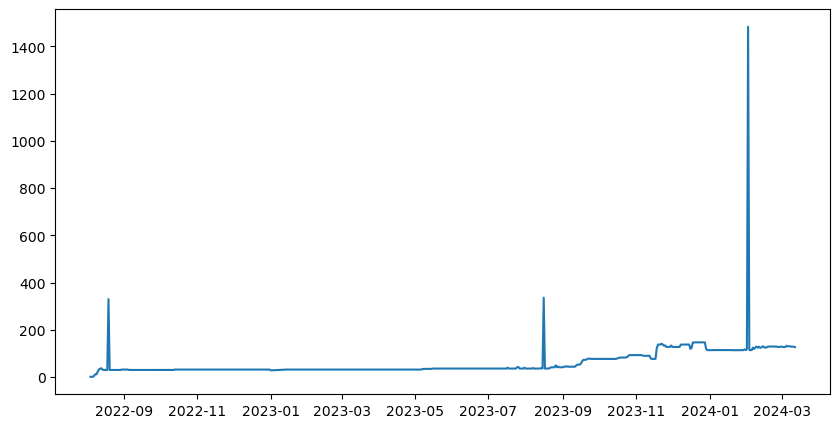

In [15]:
#ploting the historical dataset

plt.figure(figsize=(10,5))
plt.plot(azure_cost_fore.index,azure_cost_fore['Cost'])

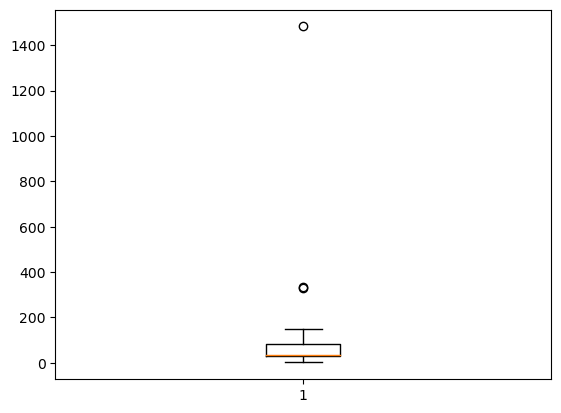

In [16]:
#checking the outliers
plt.boxplot(azure_cost_fore['Cost'])
plt.show()

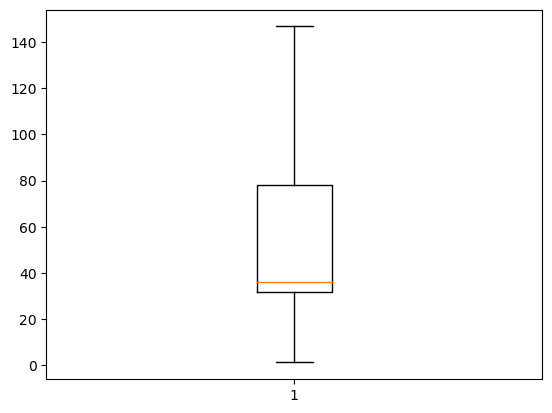

In [17]:
#remove outliers

first_quartile = azure_cost_fore['Cost'].quantile(0.25) 
third_quartile = azure_cost_fore['Cost'].quantile(0.75) 

iqr = third_quartile - first_quartile

# Define the upper and lower bounds for outlier detection
lower_bound = first_quartile - 1.5 * iqr
upper_bound = third_quartile + 1.5 * iqr

# Filter the data to keep values within the IQR range
azure_cost_fore = azure_cost_fore[(azure_cost_fore['Cost'] >= lower_bound) & (azure_cost_fore['Cost'] <= upper_bound)]
plt.boxplot(azure_cost_fore['Cost'])
plt.show()

In [18]:
#splitting the dataset

target_col = azure_cost_fore['Cost']

train_size = int(len(target_col)*0.8)
train_data= target_col.iloc[:train_size]
testing_data = target_col.iloc[train_size:]


In [19]:
#Train the ARIMA model

model = ARIMA(train_data,order=(1,0,0))
model_fit = model.fit()

In [20]:
#forecasting
forecast = model_fit.forecast(steps=len(testing_data))

In [21]:
#evaluate the accuracy

mse=mean_squared_error(testing_data,forecast)
mae = mean_absolute_error(testing_data,forecast)
rmse = np.sqrt(mse)

print("Root mean squared error: ",rmse)
print("Root mean absolute error: ",mae)

Root mean squared error:  52.76125287467291
Root mean absolute error:  51.79842082945728


In [53]:
#forcasting cost of 2024 April end
forcast = model_fit.forecast(steps=126)

result1 = list(forcast)
print('Cost of 2024 April: ',result1[len(result1)-1])

Cost of 2024 April:  71.7478781978278


# 

# Had to consider year from 2023-03-01 to 2024-03-12	

In [22]:
azure_cost_fore = azure_cost_fore.reset_index()
azure_cost_fore

,Date,Cost
0,2022-08-04,1.080000
1,2022-08-05,1.080000
2,2022-08-06,1.080000
3,2022-08-07,5.099126
4,2022-08-08,11.691428
...,...,...
568,2024-03-08,129.762067
569,2024-03-09,128.650399
570,2024-03-10,128.468520
571,2024-03-11,128.668611


In [23]:
new_df = azure_cost_fore[azure_cost_fore['Date']>='2023-03-01'].reset_index(drop=True)

<Axes: xlabel='Date'>

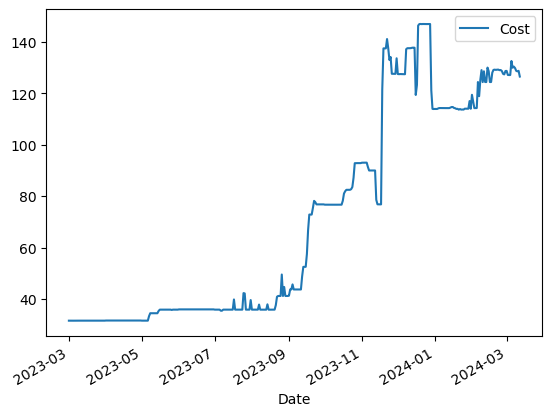

In [24]:
new_df.plot(x ='Date',y='Cost')

In [54]:
#splitting the dataset

target_col = new_df['Cost']

train_size = int(len(target_col)*0.8)
train_data= target_col.iloc[:train_size]
testing_data = target_col.iloc[train_size:]

model_v2 = ARIMA(train_data,order=(1,0,1))
model_fit_v2 = model_v2.fit()


forcast_v2 = model_fit_v2.forecast(steps=len(testing_data))


#evaluate the accuracy
mse=mean_squared_error(testing_data,forcast_v2)
mae = mean_absolute_error(testing_data,forcast_v2)
rmse = np.sqrt(mse)

print("Root mean squared error: ",rmse)
print("Root mean absolute error: ",mae)

Root mean squared error:  19.4262794588951
Root mean absolute error:  15.580326155110676


In [50]:
#forcasting cost of 2024 April end
forcast_v2 = model_fit_v2.forecast(steps=126)

result = list(forcast_v2)
print('Cost of 2024 April: ',result[len(result)-1])

Cost of 2024 April:  118.80738130306051
